In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

fsize = 8
tsize = 8
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
plt.style.use('grid')
# plt.style.use('default')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

# errbar_kwargs = dict(marker='.', markersize=3, capsize=3, elinewidth=1, lw=1)
# plot_kwargs = dict(marker='.', markersize=3, lw=1)
# errband_kwargs = dict(alpha=0.25)
errbar_kwargs = dict(estimator='mean', errorbar=('ci', 95), errwidth=1.25, capsize=0.05,)

save_dir = '../tmlr/figs/experiments'

In [2]:
task_label_map = {'1task_between': 'between', '1task_match_patt': 'match pattern',
    'occurs': 'occurs', 'xoccurs': 'xoccurs', 'same': 'same'}

model_label_map = {
    'corelnet': 'CoRelNet','predinet': 'PrediNet',
    'transformer': 'Transformer', #'abstractor': 'Abstractor',
    'relconvnet': 'RelConvNet',
    'relconvnet_maxpool': 'RelConvNet (MaxPool)',
    # 'tempgroup_relconvnet': 'RelConvNet (Temporal G)',
    # 'featuregroup_relconvnet': 'RelConvNet (Feature G)',
    # 'contextgroup_relconvnet': 'RelConvNet (Contextual G)',
    'gru': 'GRU',
    'lstm': 'LSTM',
    'gcn': 'GCN',
    'gat': 'GAT',
    'gin': 'GIN',
    'cnn': 'CNN',
    }

# cmap = plt.cm.tab10
cmap_ = sns.color_palette('muted', as_cmap=True)
cmap_ = sns.color_palette('deep', as_cmap=True)
cmap = lambda x: cmap_[x]
color_map = {
    'CoRelNet': cmap(1), 'Abstractor': cmap(7),
    'PrediNet': cmap(3), 'Transformer': cmap(2),
    'RelConvNet': cmap(0),
    'RelConvNet (MaxPool)': cmap(0),
    # 'RelConvNet (Temporal G)': cmap(9),
    # 'RelConvNet (Feature G)': cmap(6),
    # 'RelConvNet (Contextual G)': cmap(4),
    'LSTM': cmap(7), 'GRU': cmap(7),
    'GCN': cmap(6), 'GAT': cmap(4), 'GIN': cmap(8),
    'CNN': cmap(5),
    }

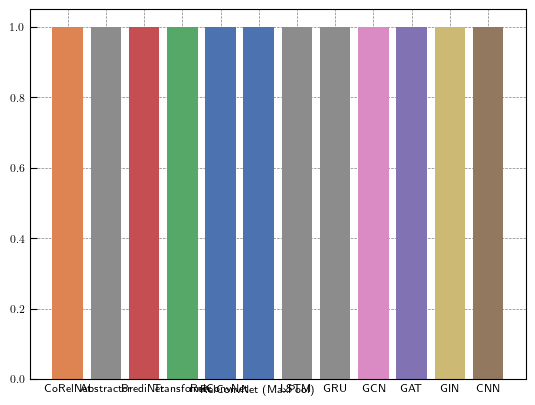

In [3]:
plt.bar(list(range(len(color_map))), 1, color=color_map.values());
plt.xticks(list(range(len(color_map))), color_map.keys());

## Hyperparameter Sweep (Contains *Set*)

In [4]:
## n_layers

In [5]:
results_df = pd.read_csv('figure_data/contains_set/hyperparam_sweep_end-of-training-accuracy.csv')
models = ['transformer', 'gcn', 'gat', 'gin']
# models = ['transformer', 'gcn', 'gat', 'gin']
group_filter = results_df.model_type.isin(models)
results_df = results_df[group_filter]

results_df['model_type'] = pd.Categorical(results_df['model_type'], categories=models, ordered=True)
results_df.sort_values('model_type', inplace=True)
results_df['model_type'] = results_df['model_type'].map(model_label_map)
results_df.rename(columns={'model_type': 'Model', 'acc': 'Accuracy', 'weight_decay': 'Weight Decay', 'n_layers': 'Number of Layers'},
    inplace=True)

In [6]:
task_run_histories = pd.read_csv('figure_data/contains_set/hyperparam_sweep_run_history.csv', index_col=0)

# model filter / sorting
models = ['transformer', 'gcn', 'gat', 'gin']
# models = ['transformer', 'gcn', 'gat', 'gin']
group_filter = task_run_histories.model_type.isin(models)
task_run_histories = task_run_histories[group_filter]

task_run_histories['model_type'] = pd.Categorical(task_run_histories['model_type'], categories=models, ordered=True)
task_run_histories.sort_values('model_type', inplace=True)
task_run_histories['model_type'] = task_run_histories['model_type'].map(model_label_map)
task_run_histories.rename(columns={
    'model_type': 'Model', 'acc': 'Accuracy', 'weight_decay': 'Weight Decay', 'n_layers': 'Number of Layers'},
    inplace=True)

task_run_histories.rename(columns={
    'epoch/epoch': 'epoch', 'epoch/acc': 'Training Accuracy', 'epoch/val_acc': 'Validation Accuracy'},
    inplace=True)

### Number of Layer

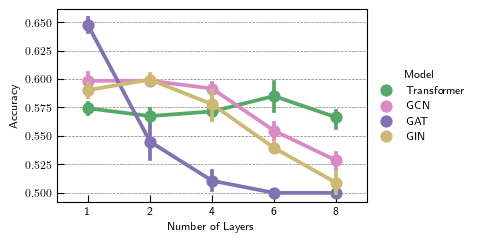

In [7]:
opt, lr_sched = 'adam', 'none'
filter_ = (results_df['optimizer'] == opt) & (results_df['lr_sched'] == lr_sched) & (results_df['Number of Layers'] > 0)
fig_df = results_df[filter_]

fig, ax = plt.subplots(figsize=(4, 2.5))
g = sns.pointplot(
    fig_df, x='Number of Layers', y='Accuracy', hue='Model', #marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax);
# g.set(xscale='log')
# sns.move_legend(ax, "lower center", frameon=False, bbox_to_anchor=(0.5, -0.3), ncol=4)
sns.move_legend(ax, "center right", frameon=False, bbox_to_anchor=(1.35, 0.5))

# fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/contains_set_n_layers_exploration_{opt}-lr_{lr_sched}.pdf')

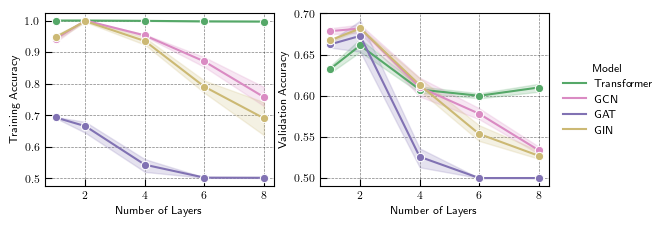

In [8]:
filter_ = (task_run_histories['optimizer'] == opt) & (task_run_histories['lr_sched'] == lr_sched) & (task_run_histories['Number of Layers'] > 0)
fig_df = task_run_histories[filter_]
fig_df = fig_df.groupby(['Number of Layers', 'Model', 'trial'])[['Accuracy', 'Training Accuracy', 'Validation Accuracy']].max().reset_index()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6.5, 2.25))

g = sns.lineplot(
    fig_df, x='Number of Layers', y='Training Accuracy', hue='Model', marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax1, legend=False);
# g.set(xscale='log')

g = sns.lineplot(
    fig_df, x='Number of Layers', y='Validation Accuracy', hue='Model', marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax2);
# g.set(xscale='log')
# sns.move_legend(ax, "lower center", frameon=False, bbox_to_anchor=(0.5, -0.3), ncol=4)
sns.move_legend(ax2, "center right", ncols=1, frameon=False, fancybox=False,
    bbox_to_anchor=(1.5, 0.5))
# fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/contains_set_n_layers_exploration_{opt}-lr_{lr_sched}-trainval.pdf', bbox_inches='tight')

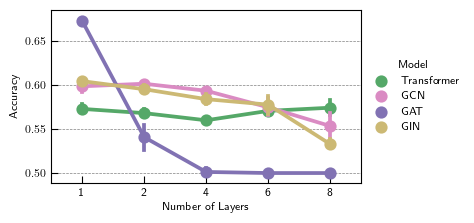

In [9]:
opt, lr_sched = 'adamw', 'none'
filter_ = (results_df['optimizer'] == opt) & (results_df['lr_sched'] == lr_sched) & (results_df['Number of Layers'] > 0)
fig_df = results_df[filter_]

fig, ax = plt.subplots(figsize=(4, 2.25))
g = sns.pointplot(
    fig_df, x='Number of Layers', y='Accuracy', hue='Model', #marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax);
# g.set(xscale='log')
sns.move_legend(ax, "center right", frameon=False, bbox_to_anchor=(1.35, 0.5))

# fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/contains_set_n_layers_exploration_{opt}-lr_{lr_sched}.pdf')

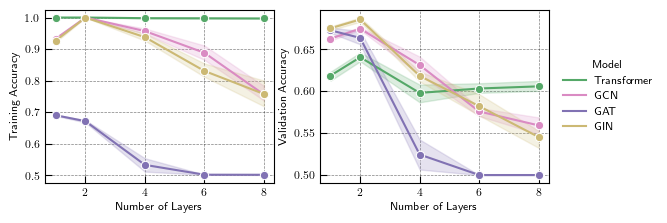

In [10]:
filter_ = (task_run_histories['optimizer'] == opt) & (task_run_histories['lr_sched'] == lr_sched) & (task_run_histories['Number of Layers'] > 0)
fig_df = task_run_histories[filter_]
fig_df = fig_df.groupby(['Number of Layers', 'Model', 'trial'])[['Accuracy', 'Training Accuracy', 'Validation Accuracy']].max().reset_index()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6.5, 2.25))

g = sns.lineplot(
    fig_df, x='Number of Layers', y='Training Accuracy', hue='Model', marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax1, legend=False);
# g.set(xscale='log')

g = sns.lineplot(
    fig_df, x='Number of Layers', y='Validation Accuracy', hue='Model', marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax2);
# g.set(xscale='log')
# sns.move_legend(ax, "lower center", frameon=False, bbox_to_anchor=(0.5, -0.3), ncol=4)
sns.move_legend(ax2, "center right", ncols=1, frameon=False, fancybox=False,
    bbox_to_anchor=(1.5, 0.5))
# fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/contains_set_n_layers_exploration_{opt}-lr_{lr_sched}-trainval.pdf', bbox_inches='tight')

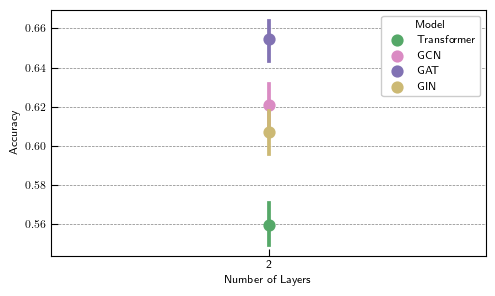

In [11]:
# adamw optimizer; cosine learning rate schedule; effect of weight decay
opt, lr_sched = 'adamw', 'cosine'
filter_ = (results_df['optimizer'] == opt) & (results_df['lr_sched'] == lr_sched) & (results_df['Number of Layers'] > 0)
fig_df = results_df[filter_]

fig, ax = plt.subplots(figsize=(5, 3))
g = sns.pointplot(
    fig_df, x='Number of Layers', y='Accuracy', hue='Model', #marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax);
# g.set(xscale='log')
# sns.move_legend(ax, "lower center", frameon=False, bbox_to_anchor=(0.5, -0.3), ncol=4)
# sns.move_legend(ax, "lower right", frameon=True, fancybox=True, framealpha=0.85)

fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/contains_set_n_layers_exploration_{opt}-lr_{lr_sched}.pdf')

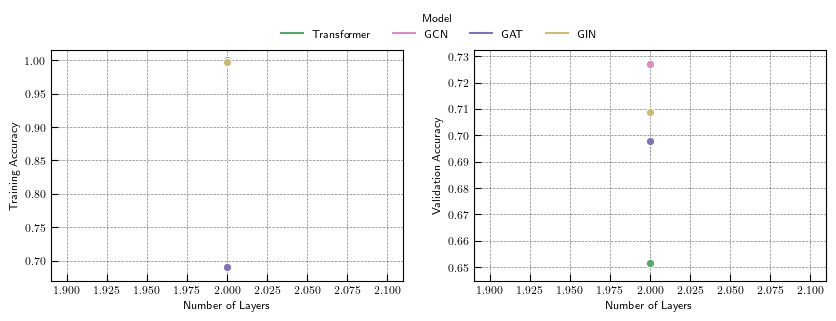

In [12]:
# adamw optimizer; cosine learning rate schedule; effect of weight decay
filter_ = (task_run_histories['optimizer'] == opt) & (task_run_histories['lr_sched'] == lr_sched) & (task_run_histories['Number of Layers'] > 0)
fig_df = task_run_histories[filter_]
fig_df = fig_df.groupby(['Number of Layers', 'Model', 'trial'])[['Accuracy', 'Training Accuracy', 'Validation Accuracy']].max().reset_index()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

g = sns.lineplot(
    fig_df, x='Number of Layers', y='Training Accuracy', hue='Model', marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax1, legend=False);
# g.set(xscale='log')

g = sns.lineplot(
    fig_df, x='Number of Layers', y='Validation Accuracy', hue='Model', marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax2);
# g.set(xscale='log')
# sns.move_legend(ax, "lower center", frameon=False, bbox_to_anchor=(0.5, -0.3), ncol=4)
sns.move_legend(ax2, "upper center", ncols=4, frameon=False, fancybox=False,
    bbox_to_anchor=(-0.1, 1.2))

### weight decay

In [13]:
results_df = pd.read_csv('figure_data/contains_set/hyperparam_sweep_end-of-training-accuracy.csv')
models = ['corelnet', 'predinet', 'transformer', 'gcn', 'gat', 'gin', 'lstm', 'cnn']
# models = ['transformer', 'gcn', 'gat', 'gin']
group_filter = results_df.model_type.isin(models)
results_df = results_df[group_filter]

results_df['model_type'] = pd.Categorical(results_df['model_type'], categories=models, ordered=True)
results_df.sort_values('model_type', inplace=True)
results_df['model_type'] = results_df['model_type'].map(model_label_map)
results_df.rename(columns={'model_type': 'Model', 'acc': 'Accuracy', 'weight_decay': 'Weight Decay', 'n_layers': 'Number of Layers'},
    inplace=True)

In [14]:
task_run_histories = pd.read_csv('figure_data/contains_set/hyperparam_sweep_run_history.csv', index_col=0)

# model filter / sorting
models = ['corelnet', 'predinet', 'transformer', 'gcn', 'gat', 'gin', 'lstm', 'cnn']
# models = ['transformer', 'gcn', 'gat', 'gin']
group_filter = task_run_histories.model_type.isin(models)
task_run_histories = task_run_histories[group_filter]

task_run_histories['model_type'] = pd.Categorical(task_run_histories['model_type'], categories=models, ordered=True)
task_run_histories.sort_values('model_type', inplace=True)
task_run_histories['model_type'] = task_run_histories['model_type'].map(model_label_map)
task_run_histories.rename(columns={
    'model_type': 'Model', 'acc': 'Accuracy', 'weight_decay': 'Weight Decay', 'n_layers': 'Number of Layers'},
    inplace=True)

task_run_histories.rename(columns={
    'epoch/epoch': 'epoch', 'epoch/acc': 'Training Accuracy', 'epoch/val_acc': 'Validation Accuracy'},
    inplace=True)

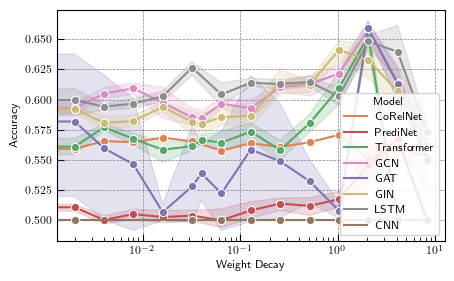

In [15]:
# adamw optimizer; cosine learning rate schedule; effect of weight decay
opt, lr_sched = 'adamw', 'none'

filter_ = (results_df['optimizer'] == opt) & (results_df['lr_sched'] == lr_sched)
fig_df = results_df[filter_]

fig, ax = plt.subplots(figsize=(5, 3))
g = sns.lineplot(
    fig_df, x='Weight Decay', y='Accuracy', hue='Model', marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax);
g.set(xscale='log')
# sns.move_legend(ax, "lower center", frameon=False, bbox_to_anchor=(0.5, -0.3), ncol=4)
sns.move_legend(ax, "lower right", frameon=True, fancybox=True, framealpha=0.85)

fig.savefig(f'{save_dir}/contains_set_weight_decay_exploration_{opt}-lr_{lr_sched}.pdf', bbox_inches='tight')

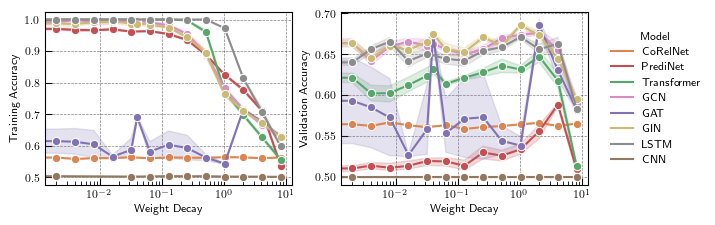

In [16]:
# adamw optimizer; cosine learning rate schedule; effect of weight decay
filter_ = (task_run_histories['optimizer'] == opt) & (task_run_histories['lr_sched'] == lr_sched)
fig_df = task_run_histories[filter_]
fig_df = fig_df.groupby(['Weight Decay', 'Model', 'trial'])[['Accuracy', 'Training Accuracy', 'Validation Accuracy']].max().reset_index()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7, 2.25))

g = sns.lineplot(
    fig_df, x='Weight Decay', y='Training Accuracy', hue='Model', marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax1, legend=False);
g.set(xscale='log')

g = sns.lineplot(
    fig_df, x='Weight Decay', y='Validation Accuracy', hue='Model', marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax2);
g.set(xscale='log')
sns.move_legend(ax2, "center right", ncols=1, frameon=False, fancybox=False,
    bbox_to_anchor=(1.5, 0.5))
fig.savefig(f'{save_dir}/contains_set_weight_decay_exploration_{opt}-lr_{lr_sched}-trainval.pdf', bbox_inches='tight')

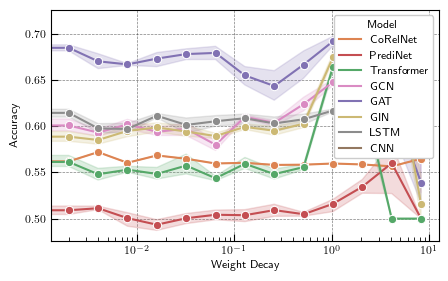

In [17]:
# adamw optimizer; cosine learning rate schedule; effect of weight decay
opt, lr_sched = 'adamw', 'cosine'

filter_ = (results_df['optimizer'] == opt) & (results_df['lr_sched'] == lr_sched)
fig_df = results_df[filter_]

fig, ax = plt.subplots(figsize=(5, 3))
g = sns.lineplot(
    fig_df, x='Weight Decay', y='Accuracy', hue='Model', marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax);
g.set(xscale='log')
# sns.move_legend(ax, "lower center", frameon=False, bbox_to_anchor=(0.5, -0.3), ncol=4)
sns.move_legend(ax2, "center right", ncols=1, frameon=False, fancybox=False,
    bbox_to_anchor=(1.5, 0.5))

# fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/contains_set_weight_decay_exploration_{opt}-lr_{lr_sched}.pdf', bbox_inches='tight')

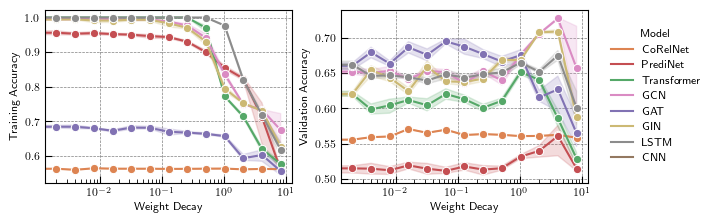

In [18]:
# adamw optimizer; cosine learning rate schedule; effect of weight decay
filter_ = (task_run_histories['optimizer'] == opt) & (task_run_histories['lr_sched'] == lr_sched)
fig_df = task_run_histories[filter_]
fig_df = fig_df.groupby(['Weight Decay', 'Model', 'trial'])[['Accuracy', 'Training Accuracy', 'Validation Accuracy']].max().reset_index()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7, 2.25))

g = sns.lineplot(
    fig_df, x='Weight Decay', y='Training Accuracy', hue='Model', marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax1, legend=False);
g.set(xscale='log')

g = sns.lineplot(
    fig_df, x='Weight Decay', y='Validation Accuracy', hue='Model', marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax2);
g.set(xscale='log')
sns.move_legend(ax2, "center right", ncols=1, frameon=False, fancybox=False,
    bbox_to_anchor=(1.5, 0.5))
fig.savefig(f'{save_dir}/contains_set_weight_decay_exploration_{opt}-lr_{lr_sched}-trainval.pdf', bbox_inches='tight')

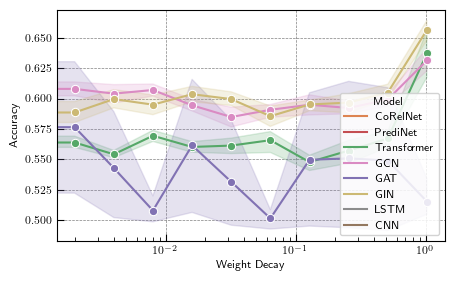

In [19]:
# adamw optimizer; cosine learning rate schedule; effect of weight decay
opt, lr_sched = 'adam', 'none'

filter_ = (results_df['optimizer'] == opt) & (results_df['lr_sched'] == lr_sched)
fig_df = results_df[filter_]

fig, ax = plt.subplots(figsize=(5, 3))
g = sns.lineplot(
    fig_df, x='Weight Decay', y='Accuracy', hue='Model', marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax);
g.set(xscale='log')
# sns.move_legend(ax, "lower center", frameon=False, bbox_to_anchor=(0.5, -0.3), ncol=4)
sns.move_legend(ax, "lower right", frameon=True, fancybox=True, framealpha=0.85)

# fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/contains_set_weight_decay_exploration_{opt}-lr_{lr_sched}.pdf', bbox_inches='tight')

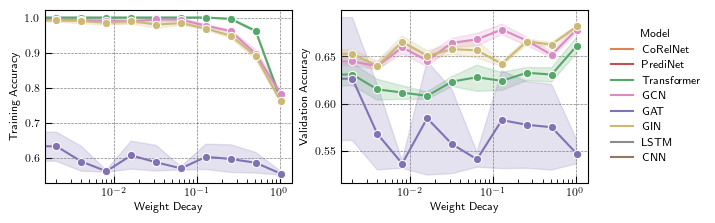

In [20]:
filter_ = (task_run_histories['optimizer'] == opt) & (task_run_histories['lr_sched'] == lr_sched)
fig_df = task_run_histories[filter_]
fig_df = fig_df.groupby(['Weight Decay', 'Model', 'trial'])[['Accuracy', 'Training Accuracy', 'Validation Accuracy']].max().reset_index()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7, 2.25))

g = sns.lineplot(
    fig_df, x='Weight Decay', y='Training Accuracy', hue='Model', marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax1, legend=False);
g.set(xscale='log')

g = sns.lineplot(
    fig_df, x='Weight Decay', y='Validation Accuracy', hue='Model', marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax2);
g.set(xscale='log')
sns.move_legend(ax2, "center right", ncols=1, frameon=False, fancybox=False,
    bbox_to_anchor=(1.5, 0.5))

fig.savefig(f'{save_dir}/contains_set_weight_decay_exploration_{opt}-lr_{lr_sched}-trainval.pdf', bbox_inches='tight')

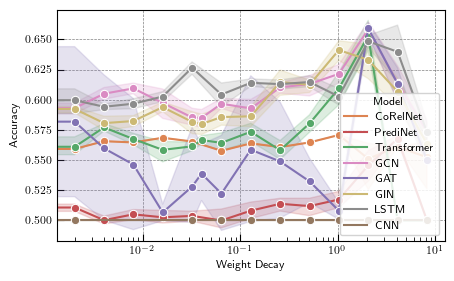

In [21]:
# adamw optimizer; cosine learning rate schedule; effect of weight decay
opt, lr_sched = 'adamw', 'none'

filter_ = (results_df['optimizer'] == opt) & (results_df['lr_sched'] == lr_sched)
fig_df = results_df[filter_]

fig, ax = plt.subplots(figsize=(5, 3))
g = sns.lineplot(
    fig_df, x='Weight Decay', y='Accuracy', hue='Model', marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax);
g.set(xscale='log')
# sns.move_legend(ax, "lower center", frameon=False, bbox_to_anchor=(0.5, -0.3), ncol=4)
sns.move_legend(ax, "lower right", frameon=True, fancybox=True, framealpha=0.85)

# fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/contains_set_weight_decay_exploration_{opt}-lr_{lr_sched}.pdf', bbox_inches='tight')

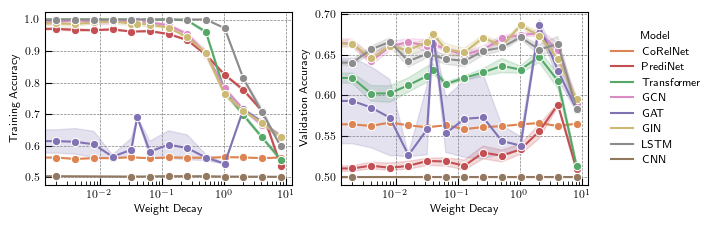

In [22]:
# adamw optimizer; cosine learning rate schedule; effect of weight decay
filter_ = (task_run_histories['optimizer'] == opt) & (task_run_histories['lr_sched'] == lr_sched)
fig_df = task_run_histories[filter_]
fig_df = fig_df.groupby(['Weight Decay', 'Model', 'trial'])[['Accuracy', 'Training Accuracy', 'Validation Accuracy']].max().reset_index()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7, 2.25))

g = sns.lineplot(
    fig_df, x='Weight Decay', y='Training Accuracy', hue='Model', marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax1, legend=False);
g.set(xscale='log')

g = sns.lineplot(
    fig_df, x='Weight Decay', y='Validation Accuracy', hue='Model', marker='o',
    estimator='mean', errorbar=('ci', 95), palette=color_map, ax=ax2);
g.set(xscale='log')
sns.move_legend(ax2, "center right", ncols=1, frameon=False, fancybox=False,
    bbox_to_anchor=(1.5, 0.5))

fig.savefig(f'{save_dir}/contains_set_weight_decay_exploration_{opt}-lr_{lr_sched}-trainval.pdf', bbox_inches='tight')

### Learning rate schedule: constant vs cosine decay.

In [23]:
opt = 'adamw'
wt_decay = 0.032
n_layers = 2
filter_ = (task_run_histories['optimizer'] == opt) & (task_run_histories['Number of Layers'] == n_layers) & (task_run_histories['Weight Decay'] == wt_decay) # & (task_run_histories['lr_sched'] == lr_sched)
fig_df = task_run_histories[filter_]
fig_df.rename(columns={'lr_sched': 'LR Sched'}, inplace=True)
fig_df['LR Sched'] = fig_df['LR Sched'].map({'none': 'Constant', 'cosine': 'Cosine'})
fig_df['LR Sched'] = pd.Categorical(fig_df['LR Sched'], categories=['Constant', 'Cosine'], ordered=True)
# fig_df = fig_df.groupby(['Weight Decay', 'Model', 'trial'])[['Accuracy', 'Training Accuracy', 'Validation Accuracy']].max().reset_index()


C:\Users\awnya\AppData\Local\Temp\ipykernel_12676\2601804495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig_df.rename(columns={'lr_sched': 'LR Sched'}, inplace=True)
C:\Users\awnya\AppData\Local\Temp\ipykernel_12676\2601804495.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig_df['LR Sched'] = fig_df['LR Sched'].map({'none': 'Constant', 'cosine': 'Cosine'})
C:\Users\awnya\AppData\Local\Temp\ipykernel_12676\2601804495.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

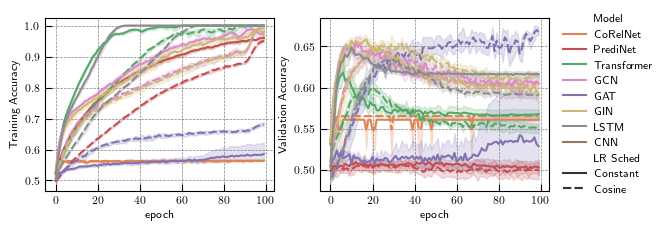

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6.5, 2.25))
sns.lineplot(fig_df, x='epoch', y='Training Accuracy', hue='Model', style='LR Sched',
        palette=color_map, ax=ax1, legend=False);
sns.lineplot(fig_df, x='epoch', y='Validation Accuracy', hue='Model', style='LR Sched',
        palette=color_map, ax=ax2);
sns.move_legend(ax2, "center right", frameon=False, fancybox=False, bbox_to_anchor=(1.5, 0.5))
fig.savefig(f'{save_dir}/contains_set_lr_sched_exploration_{opt}-wt_dec{wt_decay}.pdf', bbox_inches='tight')